In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

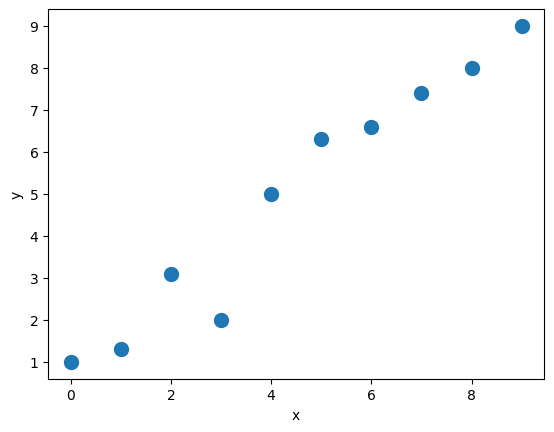

In [ ]:
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

In [ ]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [ ]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')

Epoch 0 Loss 39.897727966308594
Epoch 10 Loss 23.771896362304688
Epoch 20 Loss 1.0158109664916992
Epoch 30 Loss 14.84439754486084
Epoch 40 Loss 12.42770004272461
Epoch 50 Loss 4.990424633026123
Epoch 60 Loss 0.7894402742385864
Epoch 70 Loss 3.7337229251861572
Epoch 80 Loss 2.3938918113708496
Epoch 90 Loss 0.4471580684185028
Epoch 100 Loss 1.1215749979019165
Epoch 110 Loss 1.3219798803329468
Epoch 120 Loss 0.10764254629611969
Epoch 130 Loss 0.5718194246292114
Epoch 140 Loss 0.22559909522533417
Epoch 150 Loss 1.492234468460083
Epoch 160 Loss 0.04948029667139053
Epoch 170 Loss 0.006371333263814449
Epoch 180 Loss 0.0016818903386592865
Epoch 190 Loss 0.030461397022008896


In [ ]:
print(weight.item(), bias.item())

2.644019603729248 4.712854862213135


In [ ]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

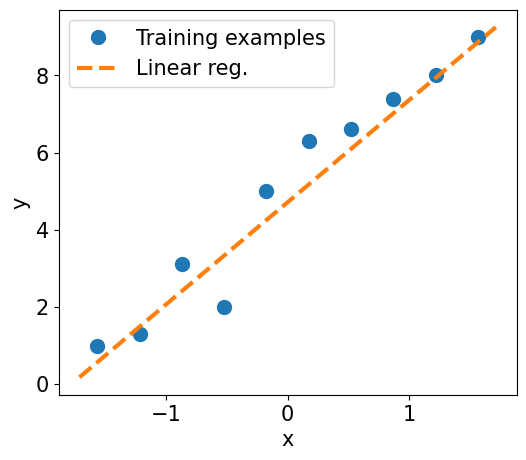

In [ ]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item()}')

Epoch 0 Loss 24.668407440185547
Epoch 10 Loss 29.1377010345459
Epoch 20 Loss 20.920650482177734
Epoch 30 Loss 0.12572920322418213
Epoch 40 Loss 12.492172241210938
Epoch 50 Loss 1.7844936847686768
Epoch 60 Loss 7.642505645751953
Epoch 70 Loss 2.560648202896118
Epoch 80 Loss 0.015652012079954147
Epoch 90 Loss 0.7547884583473206
Epoch 100 Loss 0.8412070274353027
Epoch 110 Loss 0.4923122525215149
Epoch 120 Loss 0.0823272317647934
Epoch 130 Loss 0.07943101227283478
Epoch 140 Loss 0.0890541821718216
Epoch 150 Loss 0.09728854149580002
Epoch 160 Loss 0.10431326180696487
Epoch 170 Loss 0.11034166812896729
Epoch 180 Loss 0.000948161818087101
Epoch 190 Loss 0.07635905593633652


In [ ]:
model.weight.item(), model.bias.item()

(2.6496422290802, 4.87706995010376)

In [ ]:
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/3.0, random_state=1)

In [ ]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [ ]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

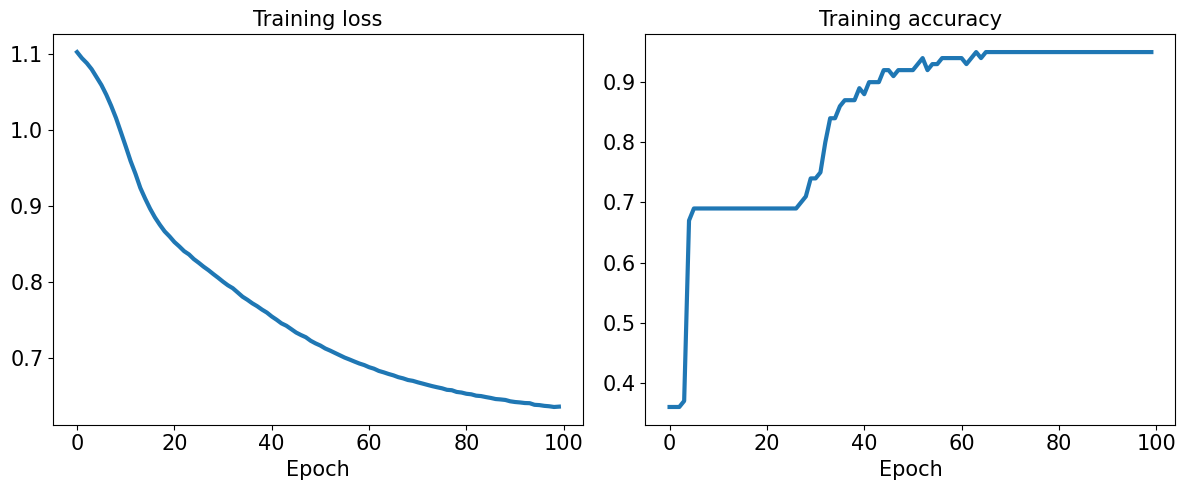

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.show()

In [ ]:
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
accuracy

tensor(0.9800)

In [ ]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [ ]:
model_new = torch.load(path, weights_only=False)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [ ]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
accuracy

tensor(0.9800)

In [ ]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [ ]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>